# Generating a Word Cloud from your Manuscript
By L.W. Cornelis van Lit, visit me on [GitHub](GitHub.com/LWCvL) , [Twitter](Twitter.com/LWCvL) , or [my personal website](http://www.lwcvl.com)

### The final result we are after is like this:
![Alt text](https://pbs.twimg.com/media/EB6ZEh9XUAA-pD-?format=png&name=900x900)

This is a word cloud based on my upcoming book [Among Digitized Manuscripts](github.com/among/digitized-manuscripts)

---
How did I do it? Let's find out.
---

### First step: extracting the text.
For this, I had my text (~125.000 words) in Word documents, one for each chapter. I gave them file names like ```X.docx``` with X a numbe from 1 to 8. 

**Note**: In this notebook we will use a smaller example [from here](https://digitalorientalist.com/2019/07/15/what-is-it-like-to-be-at-a-digital-humanities-conference/) using only one Word document. Also notice the first line is a custom command to install the package we need.

In [7]:
!pip install docx2txt
import docx2txt

fullText = ""

fullText += docx2txt.process("1.docx")
print(fullText)
# for i in range(1,9):
#     textName = str(i)+".docx"
#     fullText += docx2txt.process(textName)


# with open("python.txt", "w") as text_file:
#         text_file.write(fullText)

You should consider upgrading via the 'pip install --upgrade pip' command.
I came to DH2019 with the question: surely this is not my tribe, is it? I had the advantage, incentive even, of having this large international conference right at my home institution. This made it a lot cheaper (though far from free) to attend. On Tuesday, technically one day before the conference, I organized a full-day workshop together with people from the Eep Talstra Center of Bible and Computing (VU, Amsterdam), the Qumran Institute (RUG, Groningen), and the Faculty of  Theology and Religious Studies of KU Leuven. For more information see https://github.com/ancient-data/dh2019/wiki With 30 people in attendance from the West Coast of the US to Japan and many places in between this was an early success; now all I had to do was enjoy the conference itself.

From my perspective the conference had some unique features. I tend to go to small events so the size of 1,100 was very large for me. It was also the most

### Second step: cleaning the text.
We make everything lower case, remove digits and puncutation and remove stopwords. We lemmatize the whole thing.

In [9]:
# import pickle

import string
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

nltk_stopwords = nltk.corpus.stopwords.words('english')

# file = open('python.txt')
# book1 = file.read()
# file.close()
# print(len(book1))
# bookLower = book1.lower()

bookLower = fullText.lower()
bookLetters = bookLower.translate(str.maketrans('','', string.digits))
bookLettersOnly = bookLetters.translate(str.maketrans('', '', string.punctuation))

clean = [word for word in bookLettersOnly.split() if word not in nltk_stopwords]

reduced = [lemmatizer.lemmatize(word) for word in clean]

print(reduced)
# with open('reduced.txt', 'wb') as f:
#     pickle.dump(reduced, f)

[nltk_data] Downloading package wordnet to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['came', 'dh', 'question', 'surely', 'tribe', 'advantage', 'incentive', 'even', 'large', 'international', 'conference', 'right', 'home', 'institution', 'made', 'lot', 'cheaper', 'though', 'far', 'free', 'attend', 'tuesday', 'technically', 'one', 'day', 'conference', 'organized', 'fullday', 'workshop', 'together', 'people', 'eep', 'talstra', 'center', 'bible', 'computing', 'vu', 'amsterdam', 'qumran', 'institute', 'rug', 'groningen', 'faculty', 'theology', 'religious', 'study', 'ku', 'leuven', 'information', 'see', 'httpsgithubcomancientdatadhwiki', 'people', 'attendance', 'west', 'coast', 'u', 'japan', 'many', 'place', 'early', 'success', 'enjoy', 'conference', 'perspective', 'conference', 'unique', 'feature', 'tend', 'go', 'small', 'event', 'size', 

### Third step: Generating the word cloud

```Matplotlib``` is a work horse for generating graphics out of your data. It only takes a few lines of code (with some additional arguments to make it better looking, such as a white background) and there we go!

You should consider upgrading via the 'pip install --upgrade pip' command.


(-0.5, 699.5, 699.5, -0.5)

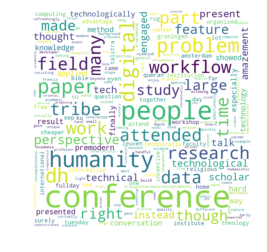

In [12]:
!pip install wordcloud
import wordcloud
import matplotlib.pyplot as plt

reducedText = ' '.join(reduced)

wordcloud = wordcloud.WordCloud(max_font_size=100, collocations=False, background_color="white", width=700, height=700).generate(reducedText)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

### Fourth step: Towards finetuning
Okay this works for a small text but for a big text we are better off with a more fine-tuned approach. We already removed stopwords but there still is a lot of 'garbage' in our word cloud created by words that are naturally common but apparently not in the stopwords list. So, let us focus on the most frequently used words and first analyze them by hand. For my book, I printed out the 350 most common words, but for this small sample text let's stick to the 10 most used words.

In [13]:
fdist = nltk.FreqDist(reduced)
mostCommon = fdist.most_common(10)
print(mostCommon)

[('conference', 11), ('people', 7), ('humanity', 5), ('dh', 4), ('paper', 4), ('problem', 4), ('digital', 4), ('many', 3), ('also', 3), ('attended', 3)]


### Fifth step: Picking only those words which are useful
Going over the list we can see that the first seven words indeed convey a meaning about the text but the last three words are not useful. If you work at scale you would save these words and their word count to disk in a .txt file and then simply prune the list to a list you are satisfied with. In this case, we can do all of it within Python.

In [15]:
wordCloudList = mostCommon[:7]
print(wordCloudList)

[('conference', 11), ('people', 7), ('humanity', 5), ('dh', 4), ('paper', 4), ('problem', 4), ('digital', 4)]


### Creating a fake text with only the words we want represented

In [18]:
wordCloudText = ""
for word in wordCloudList:
    for i in range(word[1]):
        wordCloudText += word[0]+ " "
print(wordCloudText)

conference conference conference conference conference conference conference conference conference conference conference people people people people people people people humanity humanity humanity humanity humanity dh dh dh dh paper paper paper paper problem problem problem problem digital digital digital digital 


### Creating new wordcloud

(-0.5, 699.5, 699.5, -0.5)

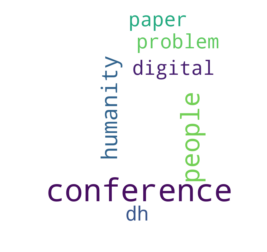

In [20]:
import wordcloud
wordcloud = wordcloud.WordCloud(max_font_size=100, collocations=False, background_color="white", width=700, height=700).generate(wordCloudText)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")